## Classification -Credit Score


## Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts. Given a person’s credit-related information, build a machine learning model that can classify the credit score

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Data

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Credit_Score\credit_score.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_8648\1920184309.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\hp\Downloads\Credit_Score\credit_score.csv")


In [3]:
df.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
9058,0x4b14,CUS_0x4a9b,March,Mattm,18,873-48-7202,Manager,9734.325_,876.193750,8,...,Bad,2558.01,29.818004,NaN,Yes,17.853985,38.09216696188389,Low_spent_Large_value_payments,301.6732226101504,Standard
38091,0xf531,CUS_0xc2ff,April,en Klaymang,27,929-86-3226,Architect,33235.35,2910.612500,3,...,Standard,212.69,26.593292,NaN,Yes,0.000000,370.05489441773864,Low_spent_Small_value_payments,211.0063555822614,Standard
83625,0x1ffff,CUS_0x649e,February,NaN,23,815-38-6088,Musician,69324.4,5509.033333,4,...,_,1075.73,30.664036,17 Years and 2 Months,Yes,115.008706,72.46139088964217,High_spent_Medium_value_payments,613.4332361896106,Standard
52179,0x147bd,CUS_0x1d28,April,Mutikanim,21,075-04-2227,Entrepreneur,16644.79,1547.065833,7,...,Bad,3519.49,34.569514,4 Years and 11 Months,Yes,100.765767,144.92561300192372,Low_spent_Small_value_payments,199.0152033321068,Poor
34984,0xe2fe,CUS_0x6e98,January,Flaki,25_,096-42-8765,Accountant,16063.455,NaN,8,...,Standard,355.79,27.137066,15 Years and 10 Months,Yes,22.059651,99.02338177286974,Low_spent_Medium_value_payments,273.1790925340325,Standard
12394,0x5ea0,CUS_0x1309,March,Mirnaw,51,691-12-6696,Writer,106876.77,NaN,4,...,Good,356.07,39.489785,29 Years and 0 Months,No,62.242581,174.96586665368596,High_spent_Large_value_payments,917.7313026893892,Good
56103,0x15eb9,CUS_0x27b9,August,Ryan Vlastelicae,18,763-32-6416,Teacher,28356.18,2425.015000,10,...,Bad,4157.2,34.062940,5 Years and 6 Months,Yes,140.698443,29.147123157747675,High_spent_Large_value_payments,312.65593372051234,Standard
17349,0x7ba7,CUS_0x2477,June,NaN,26,931-19-6828,Mechanic,45404.4,3821.700000,9,...,Standard,2313.6,30.097167,15 Years and 8 Months,NM,195.240288,130.4259689008787,High_spent_Small_value_payments,316.5037428036972,Standard
60458,0x17840,CUS_0x5f25,March,Sarah N.o,48,#F%$D@*&8,Media_Manager,121233.51,10393.792500,2,...,Good,1116.67,40.424987,23 Years and 5 Months,No,191.017350,274.5270331580067,High_spent_Medium_value_payments,823.8348667944424,Good
58875,0x16ef9,CUS_0xa70f,April,Reaneya,45_,338-92-1938,Accountant,18295.61_,1456.634167,7,...,Standard,2041.46,27.723961,18 Years and 1 Months,Yes,69.272824,190.93745936056882,Low_spent_Small_value_payments,175.45313314120872,Poor


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.shape

(100000, 28)

## Credit score dataset contains 1 lac records with 28 features

In [6]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


### Missing Values 

In [7]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

<Axes: >

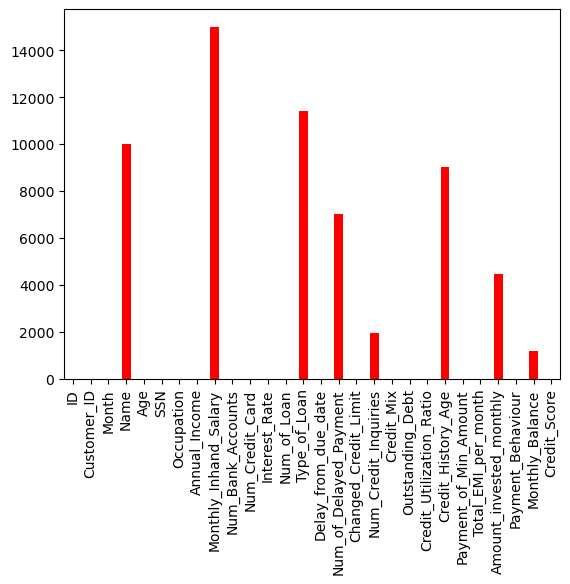

In [8]:
df.isnull().sum().plot(kind='bar',color='red')

**we can see we have a null values in 8 columns.**

### Data Cleaning

In [9]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [10]:
df["Age"]= df["Age"].astype (int)
df["Occupation"]=df["Occupation"].replace("_______",np.nan)
df["Annual_Income"]=df["Annual_Income"].str.replace("_","")
df["Annual_Income"]=df["Annual_Income"].astype (float)
df["Num_of_Loan"]=df["Num_of_Loan"].str.replace("_","")
df["Num_of_Loan"]=df["Num_of_Loan"].astype(int)
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].str.replace("_","")
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].astype (float)
df["Credit Score"]=df["Credit_Score"].replace(["Poor", "Standard", "Good"], [0,1,2])
df["Monthly_Balance"]=df["Monthly_Balance"].str.replace("_","")
df["Monthly_Balance"]=df["Monthly_Balance"].astype (float)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8", np.nan)
df["Amount_invested_monthly"]=df['Amount_invested_monthly'].str.replace('_',"")
df["Amount_invested_monthly"]=df ["Amount_invested_monthly"].astype (float)
df["Payment_of_Min_Amount"]=df ["Payment_of_Min_Amount"].replace("NM","No")
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace(["Yes","No"],[1,0])
df["Outstanding_Debt"]= df["Outstanding_Debt"].str.replace("_","")
df["Outstanding_Debt"]=df["Outstanding_Debt"].astype (float)
df["Credit_Mix"]=df["Credit_Mix"].replace("_", np.nan)
df["Changed_Credit_Limit"]= df["Changed_Credit_Limit"].replace("_", np.nan)
df["Changed_Credit_Limit"]= df["Changed_Credit_Limit"].astype (float)

In [11]:
df['Credit_Mix'].unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [12]:
df["Credit_Mix"]=df["Credit_Mix"].replace(["Standard","Good","Bad"],[1,2,0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              88592 non-null   ob

In [14]:
#creating a copy of data for future use 
copy_df = df.copy()

In [15]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
Credit Score                    0
dtype: int64

In [16]:
#useing forward and backward filling
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit Score                0
dtype: int64

## After replacing the special characters with null value. The new missing value is shown in the figure. Here Forward and backward filling method is used to fill the missing values.

## Removing the outliers 

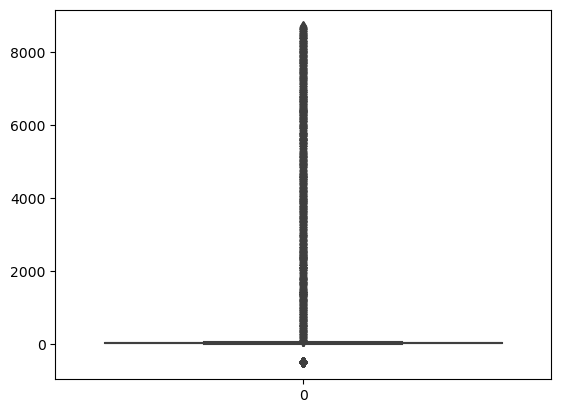

In [17]:
sns.boxplot(df['Age'])
plt.show()

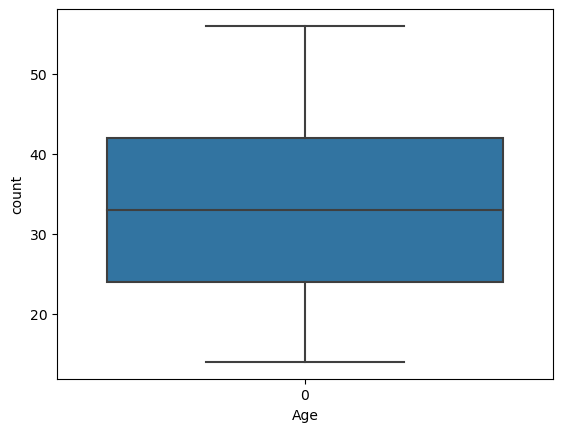

In [18]:
col_names=["Age"]
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
data = df[(df.Age >= Q1 -1.5*IQR) & (df.Age <= Q3 +1.5*IQR)]
sns.boxplot(data["Age"])
plt.xlabel("Age")
plt.ylabel('count')
plt.show()

## EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [20]:
df = df.drop(['Credit_Score','ID','Customer_ID','Name','SSN','Credit_History_Age'],axis=1)

In [21]:
df = df.drop('Type_of_Loan',axis=1)

### I have droped all the columns that are not too much usefull for the model, The column conatins too much unqiue values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

### Label encoded the object data type

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['Month'] = le.fit_transform(df['Month'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])

## Feature Selection 

In [25]:
#Useing VIF. 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X =df[col_list]
vif_data =pd.DataFrame()
vif_data["feature"] =X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Month,0.300012
1,Age,0.974661
2,Occupation,0.277722
3,Annual_Income,0.985001
4,Monthly_Inhand_Salary,0.365970
5,Num_Bank_Accounts,0.979247
6,Num_Credit_Card,0.970567
7,Interest_Rate,0.976430
8,Num_of_Loan,0.997697
9,Delay_from_due_date,0.332213


**Selecting the features using VIF. VIF should be less 
than 5. Here, all features have VIF value less than 
5, So we will select all the features.**

## MODEL BUILDING

### Logistic Regression


In [26]:
X = df.drop('Credit Score',axis=1)
y = df['Credit Score']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.61855
              precision    recall  f1-score   support

           0       0.41      0.64      0.50      3774
           1       0.71      0.65      0.68     11569
           2       0.67      0.51      0.58      4657

    accuracy                           0.62     20000
   macro avg       0.60      0.60      0.59     20000
weighted avg       0.65      0.62      0.63     20000



### Decsion Tree 

In [27]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
dc_pred = dc.predict(X_test)
print(accuracy_score(dc_pred,y_test))
print(classification_report(dc_pred,y_test))

0.6968
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      5799
           1       0.73      0.73      0.73     10657
           2       0.63      0.63      0.63      3544

    accuracy                           0.70     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.70      0.70      0.70     20000



### Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(accuracy_score(rf_pred,y_test))
print(classification_report(rf_pred,y_test))

0.79815
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      6081
           1       0.81      0.82      0.81     10520
           2       0.73      0.76      0.74      3399

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



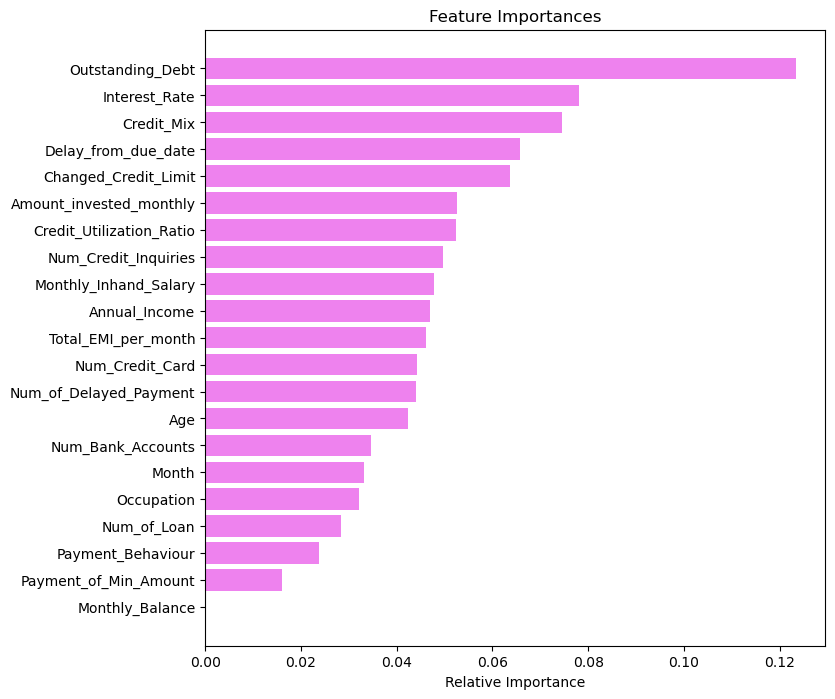

In [29]:
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyper Parameter Tuning 

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=2)
grid_search.fit(X_train,y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the testing set
best_rfc = grid_search.best_estimator_
#X_test_scaled_selected = scaler.transform(X_test.iloc[:, best_rfc.feature_importances_ > 0])
print("Accuracy on test set:", best_rfc.score(X_test, y_test))

Best hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on test set: 0.7546


### Feature Extraction 

### LDA

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train_lda, y_train)

# Predict using Random Forest Classifier
y_pred = rf.predict(X_test_lda)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.60325


### PCA

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)

# Predict using Random Forest Classifier
y_pred = rf.predict(X_test_pca)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.58665
